# **Задание 1.**
Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации.

SVM с каким ядром дал лучший результат?

# 1. Импортируем нужные библиотеки

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score

import matplotlib.pyplot as plt

# 2. Загружаем наш датасет

In [81]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


# 3. Оценка данных

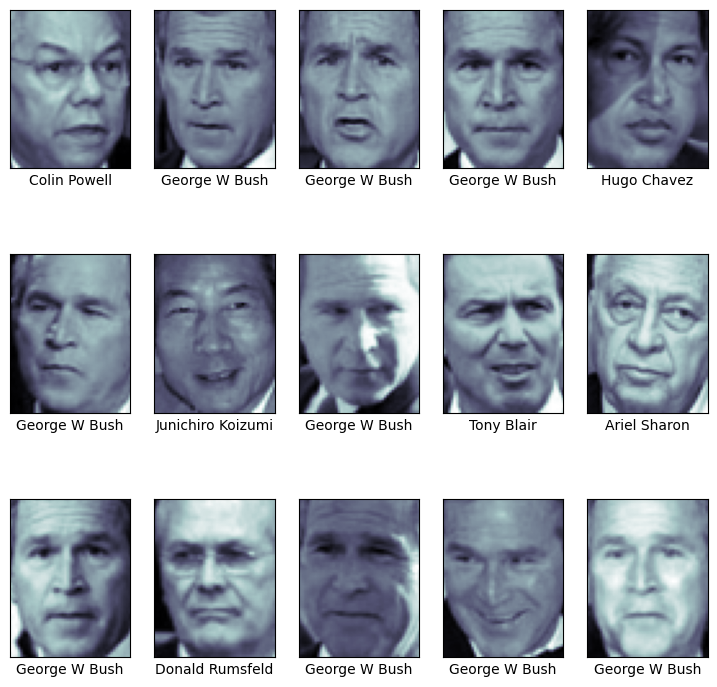

In [82]:
# Нарисуем несколько лиц из датасета
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#4. Поработаем с признаками

In [83]:
# Каждое изображение имеет размер [62×47] - это примерно 3000 пикселей. Мы можем использовать пиксели как признаки, но давайте понизим размерность пространства признаков.
faces.images.shape

(1348, 62, 47)

In [84]:
# Извлечем 150 самых информативных признаков из данных фотографий методом RandomizedPCA (помним, что это метод уменьшения размерности).

from sklearn.svm import SVC
from sklearn.decomposition import PCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

# 5. Построим модель методом опорных векторов SVM с разными ядрами

##5.1. Делим на Train и Test

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

##5.2. Гридресёрчим по ядрам SVM

In [86]:
def plotting(grid, params):
    """Функция для построения графиков"""
    scores_mean = grid.cv_results_['mean_test_score']
    scores_sd = grid.cv_results_['std_test_score']

    fig, ax = plt.subplots()
    ax.plot(params,scores_mean)
    ax.fill_between(params, (scores_mean-scores_sd), (scores_mean+scores_sd), color='g', alpha=.1)

In [87]:
def model_train(model, param_grid, hyperparams):
    """Функция подбора гиперпараметров, вызывает функцию с графиками"""
    grid = GridSearchCV(model, param_grid, scoring='f1_macro')  # если не передавать cv явно, как раз будет использована 5-fold cv
    grid.fit(Xtrain, ytrain)
    plotting(grid, hyperparams)
    print(f'Best params: {grid.best_params_}')
    best = grid.best_estimator_
    y_pred_train = best.predict(Xtrain)
    y_pred_test = best.predict(Xtest)
    print(classification_report(ytrain, y_pred_train), classification_report(ytest, y_pred_test))
    print("Precision Score : ",precision_score(ytest, y_pred_test, average='macro'))
    print("Recall Score : ",recall_score(ytest, y_pred_test, average='macro'))
    return grid

In [88]:
model = SVC()
hyperparams = ['linear']
param_grid = {'kernel': hyperparams}

SVC results
Best params: {'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00       404
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00       102

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011
               precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.84      0.84      0.84        68
           2       0.70      0.68      0.69        31
           3       0.87      0.84      0.85       126
           4       0.69      0.7

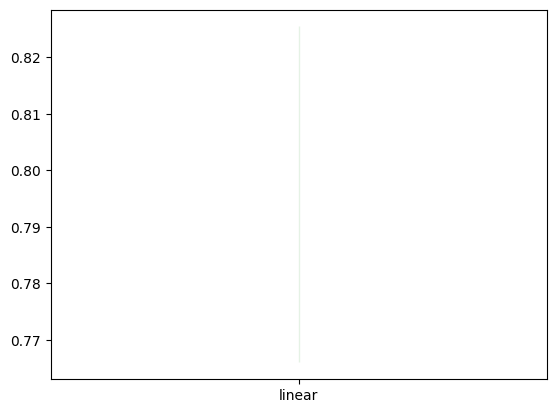

In [89]:
print('SVC results')
grid = model_train(model, param_grid, hyperparams)

In [95]:
from sklearn.pipeline import make_pipeline

model = Pipeline([
    ('scale', StandardScaler()),
    ('svc', SVC())
])

hyperparams = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
param_grid = {'svc__kernel': hyperparams}

Normalised SVC results


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a square matrix. Inpu

Best params: {'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00       404
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00       102

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.83      0.85      0.84        68
           2       0.78      0.68      0.72        31
           3       0.89      0.87      0.88       126
           4       0.71      0.87      

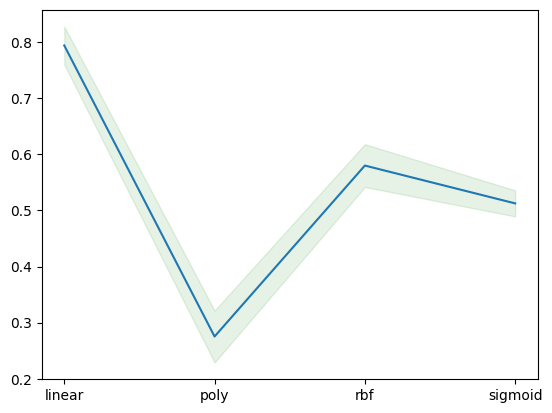

In [97]:
print('Normalised SVC results')
grid = model_train(model, param_grid, hyperparams)

In [98]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

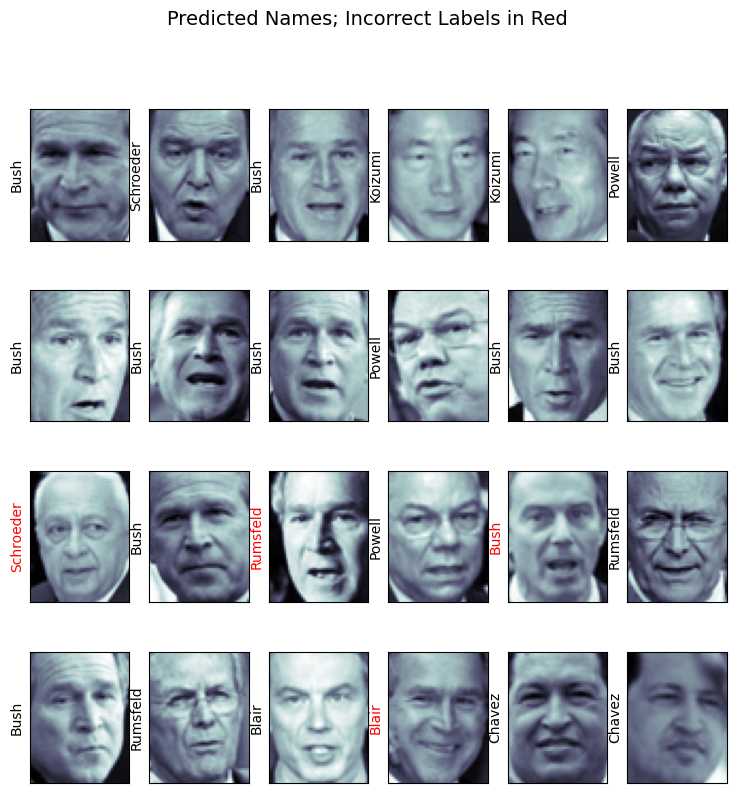

In [99]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [100]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.73      0.71        15
     Colin Powell       0.83      0.85      0.84        68
  Donald Rumsfeld       0.78      0.68      0.72        31
    George W Bush       0.89      0.87      0.88       126
Gerhard Schroeder       0.71      0.87      0.78        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.88      0.85        42

         accuracy                           0.84       337
        macro avg       0.82      0.82      0.81       337
     weighted avg       0.84      0.84      0.84       337



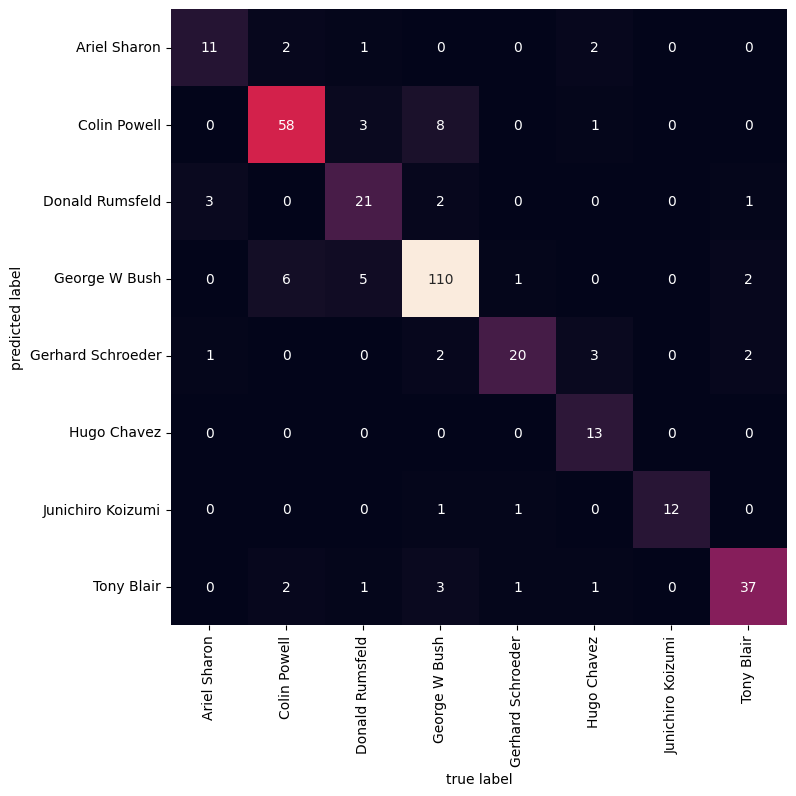

In [101]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.8367952522255193